In [60]:
import numpy as np
import pandas as pd

import numpy.random as npr
from IPython.display import HTML
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer

# train test split and preprocessing
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate, cross_val_score
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
# import data
cancer_df = pd.read_csv("data/Ovarian_patient_data.csv")

# Ovarian Cancer Risk and Progression Data

**Institute of Medical Data Processing, Biometrics, and Epidemiology (IBE)**

## About Dataset

This dataset, titled **"Ovarian Cancer Risk and Progression Data"**, contains **200,100 hourly patient records** collected between **January 2019 and December 2024**. The data originates from a healthcare repository hosted by a leading research institute in Munich, Germany. It includes an extensive array of features spanning clinical, genetic, imaging, and demographic dimensions. The dataset represents a diverse population from Munich's urban and suburban regions, ensuring broad demographic and socioeconomic variety.

Ethical protocols were strictly followed, and all personal identifiers were removed to protect patient privacy. This dataset provides invaluable resources for ovarian cancer risk prediction, cancer progression modeling, and advanced machine learning research.

---

## Dataset Composition

The dataset encompasses the following categories of features:

### Clinical Features

- **Age**: Patient's age at diagnosis, ranging from 18 to 90 years.
- **BMI**: Body Mass Index values (15–50), indicating health and weight status.
- **Comorbidities**: Presence of additional diseases, with 30% of patients reporting comorbid conditions.
- **Symptoms**: Binary feature indicating the presence of symptoms like abdominal pain or bloating.
- **CA-125 Levels**: A critical biomarker for ovarian cancer, ranging from 0 to 200.
- **Cancer Stage**: Classification into Stages 0 to IV, reflecting disease progression.
- **Histopathology**: Cancer subtypes (serous, mucinous, clear cell) based on tissue analysis.
- **Previous Treatments**: History of chemotherapy, surgery, or radiation.
- **Menstrual History**: Regular or irregular menstrual patterns.

### Demographic Features

- **Ethnicity**: Patient's ethnic background (Caucasian, Asian, African, Hispanic).
- **Smoking & Alcohol**: Lifestyle habits, with binary indicators.
- **Residence**: Urban or rural living environments.
- **Socioeconomic Status**: Economic categories (Low, Middle, High).

### Genetic Features

- **BRCA Mutation**: Binary indicator for BRCA1/BRCA2 mutations.
- **Gene Expression**: Normalized gene activity values.
- **SNP Status**: Presence of significant single nucleotide polymorphisms.
- **DNA Methylation & miRNA Levels**: Continuous variables capturing molecular markers.

### Imaging-Derived Features

- **Tumor Size & Location**: Dimensions and anatomical origin (Ovary, Fallopian Tube, Peritoneum).
- **Radiomic Features**: Texture, intensity, and shape metrics derived from imaging.
- **Enhancement Patterns**: Contrast enhancement in imaging.
- **Doppler Velocity**: Blood flow velocity within tumors.

### Reproductive and Hormonal Features

- **Parity**: Number of pregnancies (0–3).
- **Oral Contraceptives & Hormone Therapy**: Binary indicators for usage history.
- **Menarche & Menopause Age**: Age at the onset of menstruation and menopause.

---

## Target Variables

- **Risk Label**: Multi-class classification:
  - `0`: No Risk
  - `1`: Low Risk
  - `2`: Medium Risk
  - `3`: High Risk
- **Progression Probability**: Continuous variable (0–1) representing the likelihood of disease progression.

---

## Dataset Utility

This dataset is curated for advancing research in ovarian cancer risk assessment and progression modeling. It is designed to support studies leveraging **machine learning** and **deep learning techniques**, providing a real-world, comprehensive feature set.

Applications include:

- Multi-modal classification.
- Risk stratification.
- Personalized medicine development.

The high-dimensional and balanced representation ensures robust training and evaluation for predictive models. This dataset can be instrumental for researchers aiming to improve ovarian cancer diagnosis and intervention strategies.


In [3]:
cancer_df.head()


,Timestamp,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,Histopathology,PreviousTreatment,MenstrualHistory,Ethnicity,Smoking,Alcohol,Residence,SocioeconomicStatus,BRCA_Mutation,GeneExpression,SNP_Status,DNAMethylation,miRNA,TumorSize,TumorLocation,EnhancementPattern,RadiomicTexture,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
0,2019-01-01 00:00:00,67.450712,27.468755,0,0,66.738329,0,serous,0,regular,Hispanic,0,0,Urban,Middle,1,1.010648,0,0.551503,0.022742,2.976339,Ovary,0.188704,0.082624,57.572038,1.285647,1.948916,0,0,0,12.077803,54.947593,2,0.176654
1,2019-01-01 01:00:00,57.926035,27.736019,1,0,28.390526,1,clear cell,0,regular,Caucasian,0,0,Urban,Low,0,0.826971,1,0.516832,0.751493,4.746683,Ovary,0.467847,4.623101,44.385558,0.656970,3.589821,0,0,0,12.745908,46.864164,0,0.343371
2,2019-01-01 02:00:00,69.715328,22.285561,0,0,118.120787,3,clear cell,1,regular,African,0,0,Urban,Low,0,1.118767,0,0.483877,0.006208,1.358396,Ovary,0.703656,1.319485,35.711312,1.034179,3.625658,0,0,0,12.495603,55.757130,0,0.036907
3,2019-01-01 03:00:00,82.845448,31.315519,1,1,6.418598,0,serous,1,regular,African,0,0,Urban,Middle,0,1.128451,0,0.539060,0.494992,1.707042,Ovary,0.306379,0.028842,49.922109,1.000078,1.108221,0,0,0,12.577276,50.462495,1,0.161943
4,2019-01-01 04:00:00,56.487699,17.056296,1,0,65.912779,1,mucinous,0,regular,Caucasian,0,1,Rural,Middle,0,1.212960,0,0.409236,0.918252,0.423864,Ovary,0.408687,4.662631,43.547336,1.415819,1.030482,2,0,0,14.698884,58.628299,0,0.554210


# Variable Selection and Preprocessing

## Target Variables

1. **Risk Label**: Ordinal categorical data used for multi-class classification:

   - `0`: No Risk
   - `1`: Low Risk
   - `2`: Medium Risk
   - `3`: High Risk

2. **Progression Probability**: Continuous variable (range: `0–1`) representing the probability of disease progression.

---

## Predictor Variables

### Numerical Variables (Require Scaling or Normalization)

- **Age**
- **BMI**
- **CA125**
- **GeneExpression**
- **DNAMethylation**
- **miRNA**
- **TumorSize**
- **EnhancementPattern**
- **RadiomicTexture**
- **RadiomicIntensity**
- **RadiomicShape**
- **DopplerVelocity**
- **MenarcheAge**
- **MenopauseAge**

---

### Binary Categorical Variables

- **Comorbidity**
- **Symptom**
- **PreviousTreatment**
- **MenstrualHistory**
- **Smoking**
- **Alcohol**
- **Residence**
- **BRCA_Mutation**
- **SNP_Status**
- **OralContraceptives**
- **HormoneTherapy**

---

### Ordinal Categorical Variables

- **CancerStage (Already encoded as 0-4)**
- **SocioeconomicStatus**
- **Parity(Encoded as 0-3)**

---

### Nominal Categorical Variables

- **Histopathology**
- **Ethnicity**
- **TumorLocation**


In [4]:
cancer_df.Comorbidity.unique()

array([0, 1])

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               200100 non-null  object 
 1   Age                     200100 non-null  float64
 2   BMI                     200100 non-null  float64
 3   Comorbidity             200100 non-null  int64  
 4   Symptom                 200100 non-null  int64  
 5   CA125                   200100 non-null  float64
 6   CancerStage             200100 non-null  int64  
 7   Histopathology          200100 non-null  object 
 8   PreviousTreatment       200100 non-null  int64  
 9   MenstrualHistory        200100 non-null  object 
 10  Ethnicity               200100 non-null  object 
 11  Smoking                 200100 non-null  int64  
 12  Alcohol                 200100 non-null  int64  
 13  Residence               200100 non-null  object 
 14  SocioeconomicStatus 

In [6]:
cancer_df.RiskLabel.unique()

array([2, 0, 1, 3])

In [7]:
# an array of nominal categorical variables
nominal_categorical = ['Histopathology', 'Ethnicity', 'TumorLocation']
cancer_df1 = cancer_df.copy()
# cancer_df1.drop('Timestamp',axis=1,inplace=True)
# nominal = pd.get_dummies(cancer_df1[nominal_categorical], prefix_sep='_',drop_first=True )
# nominal.head()

In [8]:
# using one hot encoder to transform nominal categorical variables to (n-1) dummy variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
nominal = ohe.fit_transform(cancer_df1[nominal_categorical])
nominal = pd.DataFrame(nominal, columns=ohe.get_feature_names_out())
nominal.head()

,Histopathology_mucinous,Histopathology_serous,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,TumorLocation_Ovary,TumorLocation_Peritoneum
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [9]:
cancer_df.SocioeconomicStatus.unique()

array(['Middle', 'Low', 'High'], dtype=object)

In [10]:
ordinal_categorical = 'SocioeconomicStatus'
''' using the ordinal encode to encode 'Socioeconomicstatus', Cancerstatge and Parity are also
ordinal categorical variable which are already in the desired
'''

ordinal_encoder = OrdinalEncoder(categories=[['Low','Middle','High']])
ordinal = ordinal_encoder.fit_transform(cancer_df[[ordinal_categorical]])
ordinal = pd.DataFrame(ordinal, columns=cancer_df[[ordinal_categorical]].columns)

# ordinal categorical variables
ordinal_cat = ['CancerStage', 'Parity']
ordinal_df = cancer_df1[ordinal_cat]
ordinal = pd.concat([ordinal.reset_index(drop=True), ordinal_df.reset_index(drop=True)], axis= 1)
ordinal.head()


,SocioeconomicStatus,CancerStage,Parity
0,1.0,0,0
1,0.0,1,0
2,0.0,3,0
3,1.0,0,0
4,1.0,1,2


In [11]:
# categorical features that are binary in nature
bin_cat = ['MenstrualHistory','Residence']
ohe_bin = OneHotEncoder(drop='if_binary', sparse_output=False)
bin_enc  = ohe_bin.fit_transform(cancer_df[bin_cat])
bin_enc = pd.DataFrame(bin_enc, columns=cancer_df[bin_cat].columns)
bin_enc.head()

,MenstrualHistory,Residence
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0


In [12]:
# Binary 
binary_variables = [
    "Comorbidity",
    "Symptom",
    "PreviousTreatment",
    "Smoking",
    "Alcohol",
    "BRCA_Mutation",
    "SNP_Status",
    "OralContraceptives",
    "HormoneTherapy"
]

binary_df = cancer_df1[binary_variables]
binary_df = pd.concat([binary_df.reset_index(drop=True), bin_enc.reset_index(drop=True)],axis=1)

# Numberical variables which are already within the range of 0-1 and hence need no further standization/normalization
numerical_standard = ['DNAMethylation', 'miRNA','EnhancementPattern']
numerical_standarda_df = cancer_df1[numerical_standard]
binary_df.head()

,Comorbidity,Symptom,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,SNP_Status,OralContraceptives,HormoneTherapy,MenstrualHistory,Residence
0,0,0,0,0,0,1,0,0,0,1.0,1.0
1,1,0,0,0,0,0,1,0,0,1.0,1.0
2,0,0,1,0,0,0,0,0,0,1.0,1.0
3,1,1,1,0,0,0,0,0,0,1.0,1.0
4,1,0,0,0,1,0,0,0,0,1.0,0.0


In [13]:
numerical_standard

['DNAMethylation', 'miRNA', 'EnhancementPattern']

In [14]:
# variables in the list cat_vars are all variables which are not continuous numerical variables. 
cat_vars = ['Histopathology', 'Ethnicity', 'TumorLocation', 'SocioeconomicStatus'] + bin_cat + binary_variables + ordinal_cat + numerical_standard
# num_car is meant to hold columns names which are not in the cat_vars array, hence contains an array of numerical variables.
num_var = []
for i in cancer_df.columns:
    if i not in cat_vars:
        num_var.append(i)
# num_df holds the numerical variables in cancer_df 
num_df = cancer_df[num_var]
# drop timestamp and the two target variables. 
num_df = num_df.drop(columns=['Timestamp','RiskLabel','ProgressionProbability'])

num_df.describe()

,Age,BMI,CA125,GeneExpression,TumorSize,RadiomicTexture,RadiomicIntensity,RadiomicShape,DopplerVelocity,MenarcheAge,MenopauseAge
count,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000
mean,59.901575,28.003226,34.874555,1.000077,5.061162,1.998338,50.030013,0.999722,2.496380,13.014028,50.006837
std,14.668235,4.980700,34.411115,0.198796,2.869287,1.995070,9.993355,0.275003,1.443022,1.468198,4.783299
min,18.000000,15.000000,0.000018,0.500000,0.000000,0.000001,6.215829,0.500000,0.000007,10.000000,40.000000
25%,49.891372,24.616558,10.057735,0.864952,2.982599,0.574457,43.288079,0.796569,1.243463,11.988691,46.674184
50%,60.025998,27.998428,24.162441,0.999843,4.996637,1.386013,50.004486,1.000032,2.500433,12.999088,50.006139
75%,70.141600,31.361152,48.421526,1.134547,7.025122,2.772873,56.784981,1.202314,3.743309,14.013925,53.357075
max,90.000000,49.096832,200.000000,1.996843,15.000000,23.417463,99.203153,1.500000,4.999994,18.000000,60.000000


In [15]:
# scale numerical features using the minmax(0,1) scaler.
scaler = MinMaxScaler()
num_arr = scaler.fit_transform(num_df)
# convert the scaled array to a pd dataframe.
num_df = pd.DataFrame(num_arr, columns=num_df.columns)
# concat the numerical standard df
num_df = pd.concat([num_df.reset_index(drop=True), numerical_standarda_df.reset_index(drop=True)], axis = 1)
num_df.head()

,Age,BMI,CA125,GeneExpression,TumorSize,RadiomicTexture,RadiomicIntensity,RadiomicShape,DopplerVelocity,MenarcheAge,MenopauseAge,DNAMethylation,miRNA,EnhancementPattern
0,0.686815,0.365687,0.333692,0.341150,0.198423,0.003528,0.552293,0.785647,0.389783,0.259725,0.747380,0.551503,0.022742,0.188704
1,0.554528,0.373525,0.141953,0.218440,0.316446,0.197421,0.410483,0.156970,0.717965,0.343238,0.343208,0.516832,0.751493,0.467847
2,0.718268,0.213673,0.590604,0.413381,0.090560,0.056346,0.317199,0.534179,0.725132,0.311950,0.787856,0.483877,0.006208,0.703656
3,0.900631,0.478505,0.032093,0.419851,0.113803,0.001232,0.470024,0.500078,0.221643,0.322159,0.523125,0.539060,0.494992,0.306379
4,0.534551,0.060308,0.329564,0.476309,0.028258,0.199109,0.401469,0.915819,0.206095,0.587361,0.931415,0.409236,0.918252,0.408687


In [16]:
 # Outcome variables
Y = cancer_df[['RiskLabel', 'ProgressionProbability']]
# Predictor/input variables 
X = pd.concat([nominal.reset_index(drop=True), ordinal.reset_index(drop=True),binary_df.reset_index(drop=True),num_df.reset_index(drop=True)  ],axis=1)
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Histopathology_mucinous   200100 non-null  float64
 1   Histopathology_serous     200100 non-null  float64
 2   Ethnicity_Asian           200100 non-null  float64
 3   Ethnicity_Caucasian       200100 non-null  float64
 4   Ethnicity_Hispanic        200100 non-null  float64
 5   TumorLocation_Ovary       200100 non-null  float64
 6   TumorLocation_Peritoneum  200100 non-null  float64
 7   SocioeconomicStatus       200100 non-null  float64
 8   CancerStage               200100 non-null  int64  
 9   Parity                    200100 non-null  int64  
 10  Comorbidity               200100 non-null  int64  
 11  Symptom                   200100 non-null  int64  
 12  PreviousTreatment         200100 non-null  int64  
 13  Smoking                   200100 non-null  i

-0.009754306201283005

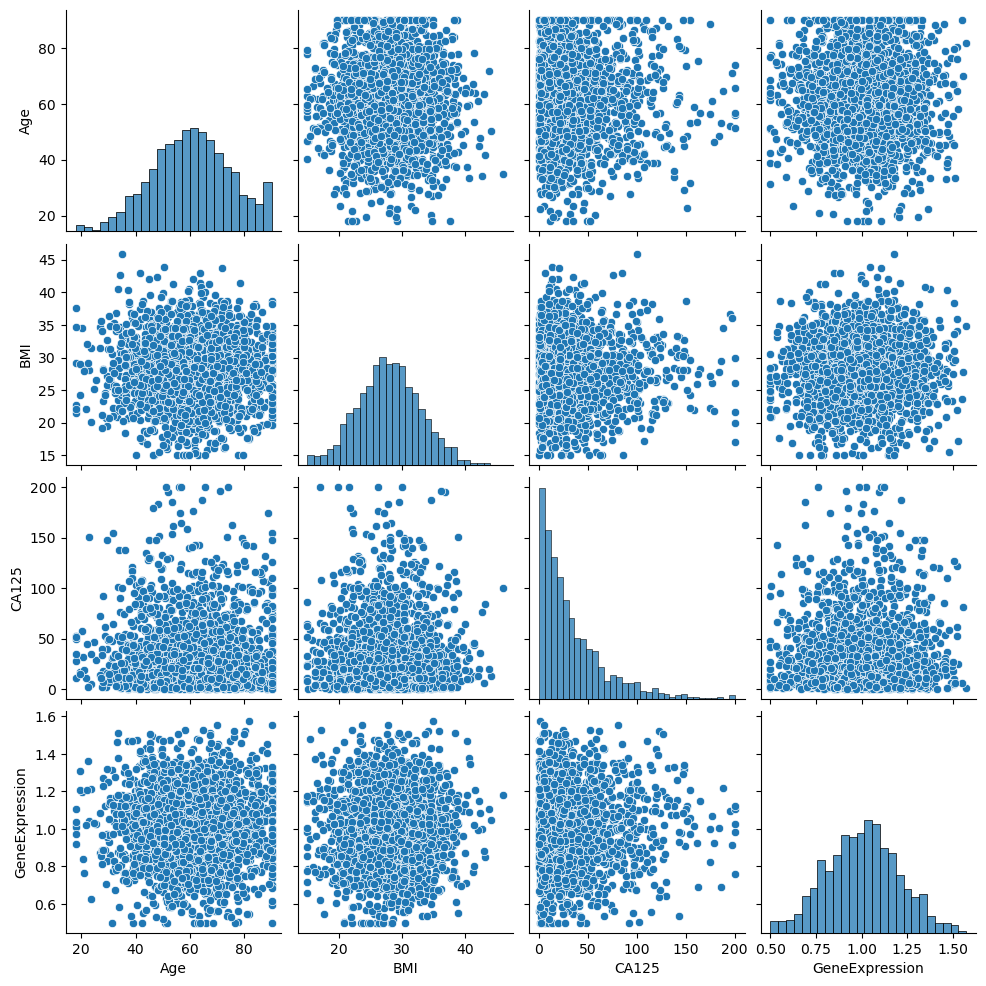

In [17]:
# sns.pairplot(num_df[1:500])
cancer_df1 = cancer_df1[1:2000]
sns.pairplot(cancer_df1[['Age','BMI','CA125','GeneExpression']])
correlation = cancer_df1['Age'].corr(cancer_df1['BMI'])
correlation

                          Histopathology_mucinous  Histopathology_serous  \
Histopathology_mucinous                  1.000000              -0.765521   
Histopathology_serous                   -0.765521               1.000000   
Ethnicity_Asian                         -0.002041               0.001581   
Ethnicity_Caucasian                      0.001706              -0.001220   
Ethnicity_Hispanic                      -0.003082               0.002943   
TumorLocation_Ovary                      0.001752              -0.003766   
TumorLocation_Peritoneum                -0.002825               0.000633   
SocioeconomicStatus                     -0.000240              -0.000591   
CancerStage                              0.000142              -0.001131   
Parity                                   0.001349              -0.000373   
Comorbidity                             -0.001463               0.001187   
Symptom                                 -0.000813               0.002798   
PreviousTrea

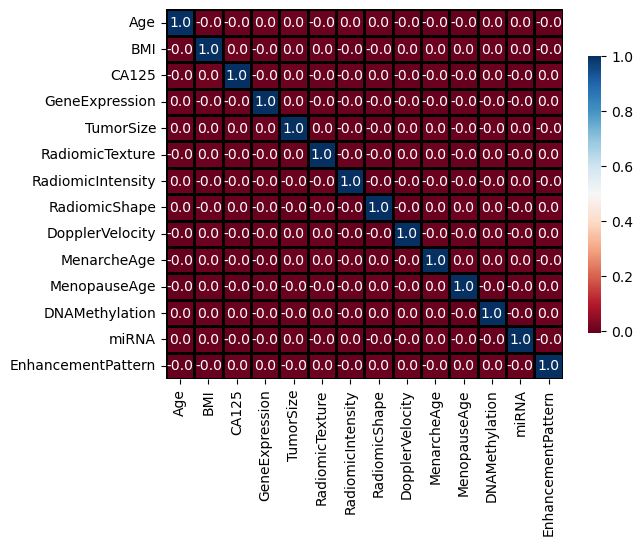

In [18]:
sns.heatmap(num_df.corr(), cmap='RdBu', annot=True, fmt=".1f", linewidths=1, linecolor="black",
            cbar=True, cbar_kws={'shrink': 0.75}, xticklabels=True, yticklabels=True)
print(X.corr())
plt.show()

In [19]:
cancer_df = pd.concat([X.reset_index(drop=True), Y.reset_index(drop=True)],axis=1)
cancer_df.head()

,Histopathology_mucinous,Histopathology_serous,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,TumorLocation_Ovary,TumorLocation_Peritoneum,SocioeconomicStatus,CancerStage,Parity,Comorbidity,Symptom,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,SNP_Status,OralContraceptives,HormoneTherapy,MenstrualHistory,Residence,Age,BMI,CA125,GeneExpression,TumorSize,RadiomicTexture,RadiomicIntensity,RadiomicShape,DopplerVelocity,MenarcheAge,MenopauseAge,DNAMethylation,miRNA,EnhancementPattern,RiskLabel,ProgressionProbability
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0,1.0,1.0,0.686815,0.365687,0.333692,0.341150,0.198423,0.003528,0.552293,0.785647,0.389783,0.259725,0.747380,0.551503,0.022742,0.188704,2,0.176654
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,1,0,0,1.0,1.0,0.554528,0.373525,0.141953,0.218440,0.316446,0.197421,0.410483,0.156970,0.717965,0.343238,0.343208,0.516832,0.751493,0.467847,0,0.343371
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0,0,0,1,0,0,0,0,0,0,1.0,1.0,0.718268,0.213673,0.590604,0.413381,0.090560,0.056346,0.317199,0.534179,0.725132,0.311950,0.787856,0.483877,0.006208,0.703656,0,0.036907
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,1,1,0,0,0,0,0,0,1.0,1.0,0.900631,0.478505,0.032093,0.419851,0.113803,0.001232,0.470024,0.500078,0.221643,0.322159,0.523125,0.539060,0.494992,0.306379,1,0.161943
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,2,1,0,0,0,1,0,0,0,0,1.0,0.0,0.534551,0.060308,0.329564,0.476309,0.028258,0.199109,0.401469,0.915819,0.206095,0.587361,0.931415,0.409236,0.918252,0.408687,0,0.554210


<Axes: >

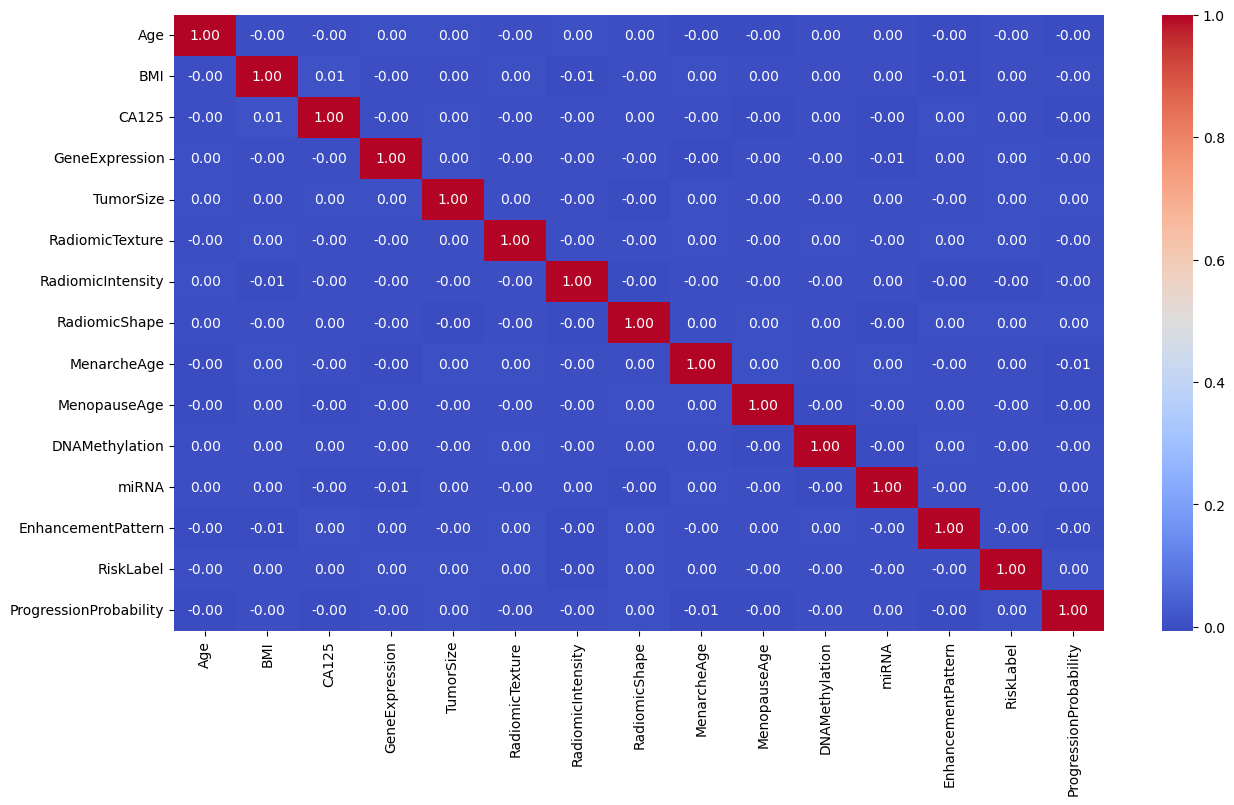

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(cancer_df[['Age','BMI','CA125','GeneExpression','TumorSize','RadiomicTexture', 'RadiomicIntensity', 'RadiomicShape','MenarcheAge','MenopauseAge','DNAMethylation','miRNA','EnhancementPattern','RiskLabel','ProgressionProbability']].corr(), cmap="coolwarm", annot=True,fmt='.2f')

-0.002761554960101475

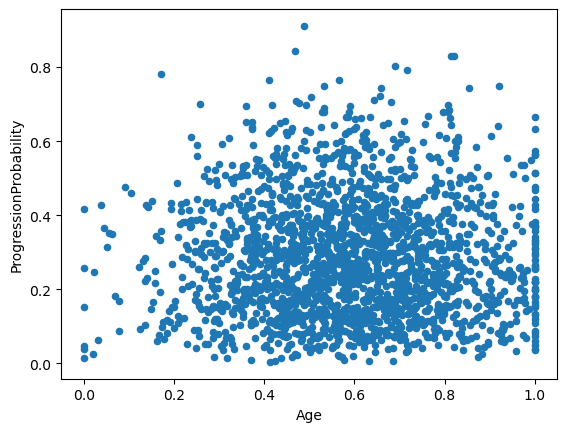

In [21]:
cancer_df[1:2000].plot.scatter(x='Age', y='ProgressionProbability')
cancer_df['Age'].corr(cancer_df['ProgressionProbability'])

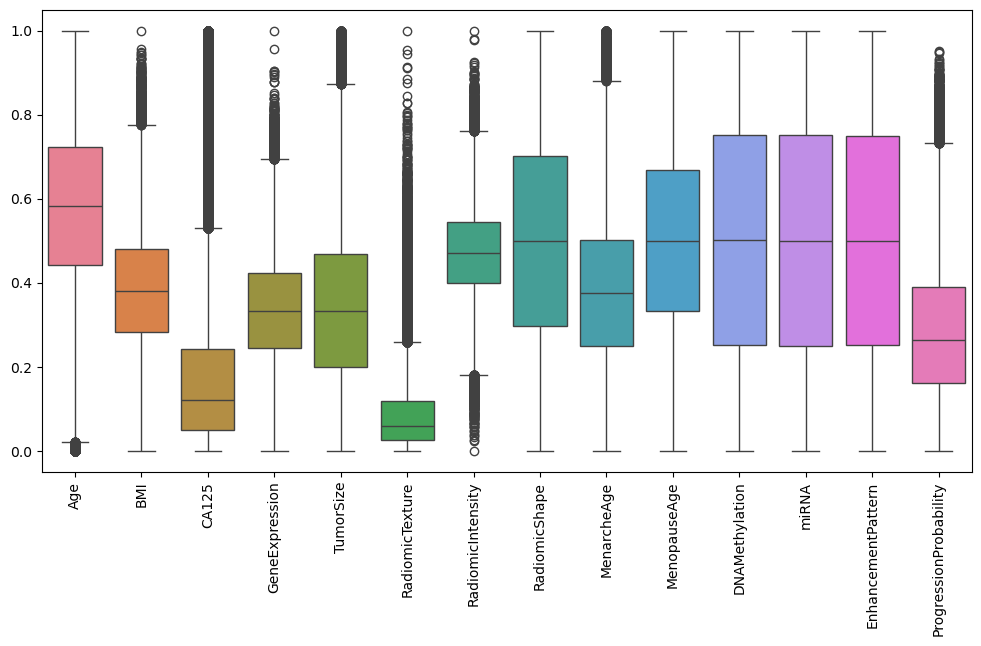

In [22]:
# num_df.boxplot(figsize=(12,6))
plt.figure(figsize=(12,6))
sns.boxplot(cancer_df[['Age','BMI','CA125','GeneExpression','TumorSize','RadiomicTexture', 'RadiomicIntensity', 'RadiomicShape','MenarcheAge','MenopauseAge','DNAMethylation','miRNA','EnhancementPattern','ProgressionProbability']])
plt.xticks(rotation=90)
plt.show()

In [41]:
X.loc[2:1]

,Histopathology_mucinous,Histopathology_serous,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,TumorLocation_Ovary,TumorLocation_Peritoneum,SocioeconomicStatus,CancerStage,Parity,Comorbidity,Symptom,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,SNP_Status,OralContraceptives,HormoneTherapy,MenstrualHistory,Residence,Age,BMI,CA125,GeneExpression,TumorSize,RadiomicTexture,RadiomicIntensity,RadiomicShape,DopplerVelocity,MenarcheAge,MenopauseAge,DNAMethylation,miRNA,EnhancementPattern
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,1,0,0,1.0,1.0,0.554528,0.373525,0.141953,0.21844,0.316446,0.197421,0.410483,0.15697,0.717965,0.343238,0.343208,0.516832,0.751493,0.467847


In [45]:
Y.head()

,RiskLabel,ProgressionProbability
0,2,0.176654
1,0,0.343371
2,0,0.036907
3,1,0.161943
4,0,0.554210


In [47]:
model = DecisionTreeClassifier(max_depth=4) # do not worry about this at the moment
model.fit(X, Y['RiskLabel'])

DecisionTreeClassifier(max_depth=4)

In [48]:
model.predict(X.loc[1000:1500])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y['RiskLabel'], test_size=0.2, random_state=123)  # 80%-20% train test split on X and y

# Print shapes
shape_dict = {
    "Data portion": ["X", "y", "X_train", "y_train", "X_test", "y_test"],
    "Shape": [
        X.shape,
        Y.shape,
        X_train.shape,
        y_train.shape,
        X_test.shape,
        y_test.shape,
    ],
}

shape_df = pd.DataFrame(shape_dict)
shape_df

,Data portion,Shape
0,X,"(200100, 35)"
1,y,"(200100, 2)"
2,X_train,"(160080, 35)"
3,y_train,"(160080,)"
4,X_test,"(40020, 35)"
5,y_test,"(40020,)"


In [52]:
model.score(X_train, y_train)

0.5995752123938031

In [53]:
print(f"The model has {model.score(X_train, y_train)*100:.2f}% training accuracy")
print(f"The model has {(1 - model.score(X_train, y_train))*100:.2f}% training error")

The model has 59.96% training accuracy
The model has 40.04% training error


In [57]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
cv_scores

array([0.59938781, 0.59932534, 0.59932534, 0.59895052, 0.59945027,
       0.59938781, 0.59938781, 0.59957521, 0.59932534, 0.5992004 ])

In [58]:
cv_scores.mean()

0.599331584207896

In [59]:
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.957881,0.002162,0.599388,0.599665
1,0.955812,0.002609,0.599325,0.599652
2,0.929588,0.002530,0.599325,0.599561
3,1.006014,0.002368,0.598951,0.599610
4,0.997200,0.002227,0.599450,0.599554
5,0.926049,0.002569,0.599388,0.599645
6,0.961018,0.002280,0.599388,0.599589
7,0.940178,0.002409,0.599575,0.599589
8,0.934541,0.002172,0.599200,0.599652
9,0.932605,0.001891,0.599200,0.599659


In [61]:
model1 = KNeighborsClassifier(n_neighbors=1) # do not worry about this at the moment
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [63]:
model1.score(X_train,y_train)

1.0

In [64]:
model2 =  KNeighborsClassifier(n_neighbors=8) # do not worry about this at the moment
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [65]:
model3 =  KNeighborsClassifier(n_neighbors=25) # do not worry about this at the moment
model3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [66]:
# score all models
scores1 = cross_validate(model1, X_train, y_train, cv=10, return_train_score=True)
scores2 = cross_validate(model2, X_train, y_train, cv=10, return_train_score=True)
scores3 = cross_validate(model3, X_train, y_train, cv=10, return_train_score=True)

# stroing all results in a dictionary
results_dict = {"models" : ["model 1", "model 2", "model 3"],
              "mean train scores": [np.mean(scores1["train_score"]),
                                    np.mean(scores2["train_score"]),
                                    np.mean(scores3["train_score"])],
               "mean cv scores": [np.mean(scores1["test_score"]),
                                    np.mean(scores2["test_score"]),
                                    np.mean(scores3["test_score"])]
              
              }

# show results in a dataframe
results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("models")
results_df

,mean train scores,mean cv scores
models,,
model 1,1.000000,0.422882
model 2,0.615792,0.566279
model 3,0.599974,0.596452


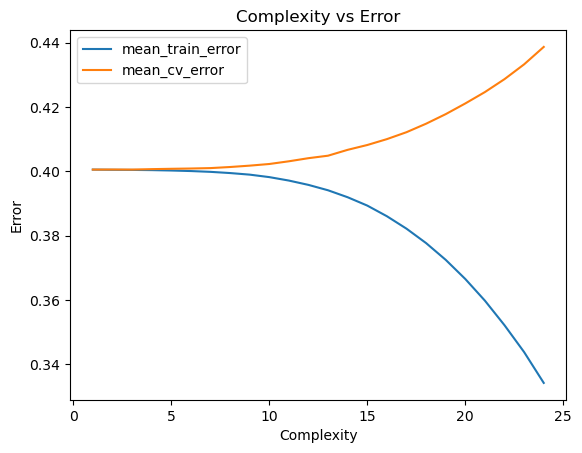

In [68]:
# do not worry about this code much!!
results_dict = {
    "depth": [],
    "mean_train_error": [],
    "mean_cv_error": [],
    "error_gap": [],
}
param_grid = {"max_depth": np.arange(1, 25)}

for depth in param_grid["max_depth"]:
    model =  DecisionTreeClassifier(max_depth=depth) # do not worry about this yet
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_error"].append(1 - np.mean(scores["test_score"]))
    results_dict["mean_train_error"].append(1 - np.mean(scores["train_score"]))
    results_dict["error_gap"].append(np.mean(scores["train_score"]) - np.mean(scores["test_score"]))

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
max_depth_plot = results_df[["mean_train_error", "mean_cv_error"]].plot(title="Complexity vs Error", xlabel="Complexity", ylabel="Error");